## Processing sensor data from Shale Hills CZO NPMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors


Current issues include:
- Determining what data should be dropped
- Adding barometric pressure 
 

In [1]:
import os
os.chdir('/Users/marcb/Desktop')
os.getcwd()

'C:\\Users\\marcb\\Desktop'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt



# Define filenames
infile1 = "CO2 Data/raw_data/Shale Hills/NPMS/NPMS_CO2_O2.csv" 
infile2 = "CO2 Data/raw_data/Shale Hills/NPMS/ShaleHills_precipitation.csv" 


# Read the .dat files as Pandas dataframes and load in the date/times
df1 = pd.read_csv(infile1,  na_values='NAN', parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN', parse_dates=[0], index_col=0) 



In [3]:
#merge dataframes and drop record columns
df=pd.concat([df1,df2], sort=False)
df=df.drop(columns="RecNum")
df=df.drop(columns='Correlation')
df=df.drop(columns='Comment')
df

,DiffVolt_1,DiffVolt_2,O2_20,O2_D_20,T109_1_C,T109_2_C,CO2_20_lo,CO2_20_hi,CO2_20_temp,CO2_D_20_lo,CO2_D_20_hi,CO2_D_20_temp,Total_Precip_mm,Device
TmStamp,,,,,,,,,,,,,,
2016-08-16 12:00:00,52.599998,47.560001,20.690001,20.440001,-273.20001,-105.4,5050.2031,2985.0740,24.200001,5009.4980,40075.980,25.700001,NaN,NaN
2016-08-16 13:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5044.7749,2957.9370,24.010000,5013.5679,40097.680,25.629999,NaN,NaN
2016-08-16 14:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5048.8838,2887.4031,23.860001,5006.8208,40054.570,25.740000,NaN,NaN
2016-08-16 15:00:00,52.320000,47.590000,20.580000,20.459999,-273.20001,-105.4,5045.0688,2854.9829,24.110001,5009.7900,40067.461,25.709999,NaN,NaN
2016-08-16 16:00:00,52.320000,47.560001,20.580000,20.440001,-273.20001,-105.4,5048.8481,2795.1160,24.219999,5008.1421,40054.289,26.139999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,OTT Pluvio392
2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,OTT Pluvio393
2018-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.7,OTT Pluvio394


In [4]:
#Rename all columns with format "var_depth.unit" (SoilTemp_102cm.deg.C)

df.columns=["DiffVolt_20cm.mV", "DiffVolt_140cm.mV", "O2_20cm.percent.0-100", "O2_140cm.percent.0-100",  "ApogeeTemp_20cm.deg.C" , "ApogeeTemp_140cm.deg.C", "CO2lo_20cm.ppm","CO2hi_20cm.ppm", "GPTemp_20cm.deg.C", "CO2lo_140cm.ppm", "CO2hi_140cm.ppm", "GPTemp_140cm.deg.C","Precipitation.mm", "Device"]
df.loc['2018-6-20':]=np.nan

df

,DiffVolt_20cm.mV,DiffVolt_140cm.mV,O2_20cm.percent.0-100,O2_140cm.percent.0-100,ApogeeTemp_20cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_20cm.ppm,CO2hi_20cm.ppm,GPTemp_20cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C,Precipitation.mm,Device
TmStamp,,,,,,,,,,,,,,
2016-08-16 12:00:00,52.599998,47.560001,20.690001,20.440001,-273.20001,-105.4,5050.2031,2985.0740,24.200001,5009.4980,40075.980,25.700001,NaN,NaN
2016-08-16 13:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5044.7749,2957.9370,24.010000,5013.5679,40097.680,25.629999,NaN,NaN
2016-08-16 14:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5048.8838,2887.4031,23.860001,5006.8208,40054.570,25.740000,NaN,NaN
2016-08-16 15:00:00,52.320000,47.590000,20.580000,20.459999,-273.20001,-105.4,5045.0688,2854.9829,24.110001,5009.7900,40067.461,25.709999,NaN,NaN
2016-08-16 16:00:00,52.320000,47.560001,20.580000,20.440001,-273.20001,-105.4,5048.8481,2795.1160,24.219999,5008.1421,40054.289,26.139999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#masking values that seem erroneous

#df['DiffVolt_30cm.mV'].mask(df['DiffVolt_30cm.mV'].between(-1,30), inplace=True)
#df['DiffVolt_140cm.mV'].mask(df['DiffVolt_140cm.mV'].between(-1,30), inplace=True)
#df.iloc[:,6].mask(df.iloc[:,6].between(-30,1), inplace=True)
#df.iloc[:,7].mask(df.iloc[:,7].between(-30,1), inplace=True)
#df.iloc[:,7].mask(df.iloc[:,7].between(30,10000), inplace=True)
#df['GPTemp_30cm.deg.C'].mask(df['GPTemp_30cm.deg.C'].between(-30,1), inplace=True)
#df['GPTemp_140cm.deg.C'].mask(df['GPTemp_140cm.deg.C'].between(-30,1), inplace=True)
#df['SoilO2_30cm.percent.0-100'].mask(df['SoilO2_30cm.percent.0-100'].between(-3,1), inplace=True)
#df['SoilO2_140cm.percent.0-100'].mask(df['SoilO2_140cm.percent.0-100'].between(-3,1), inplace=True)


df

,DiffVolt_20cm.mV,DiffVolt_140cm.mV,O2_20cm.percent.0-100,O2_140cm.percent.0-100,ApogeeTemp_20cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_20cm.ppm,CO2hi_20cm.ppm,GPTemp_20cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C,Precipitation.mm,Device
TmStamp,,,,,,,,,,,,,,
2016-08-16 12:00:00,52.599998,47.560001,20.690001,20.440001,-273.20001,-105.4,5050.2031,2985.0740,24.200001,5009.4980,40075.980,25.700001,NaN,NaN
2016-08-16 13:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5044.7749,2957.9370,24.010000,5013.5679,40097.680,25.629999,NaN,NaN
2016-08-16 14:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5048.8838,2887.4031,23.860001,5006.8208,40054.570,25.740000,NaN,NaN
2016-08-16 15:00:00,52.320000,47.590000,20.580000,20.459999,-273.20001,-105.4,5045.0688,2854.9829,24.110001,5009.7900,40067.461,25.709999,NaN,NaN
2016-08-16 16:00:00,52.320000,47.560001,20.580000,20.440001,-273.20001,-105.4,5048.8481,2795.1160,24.219999,5008.1421,40054.289,26.139999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


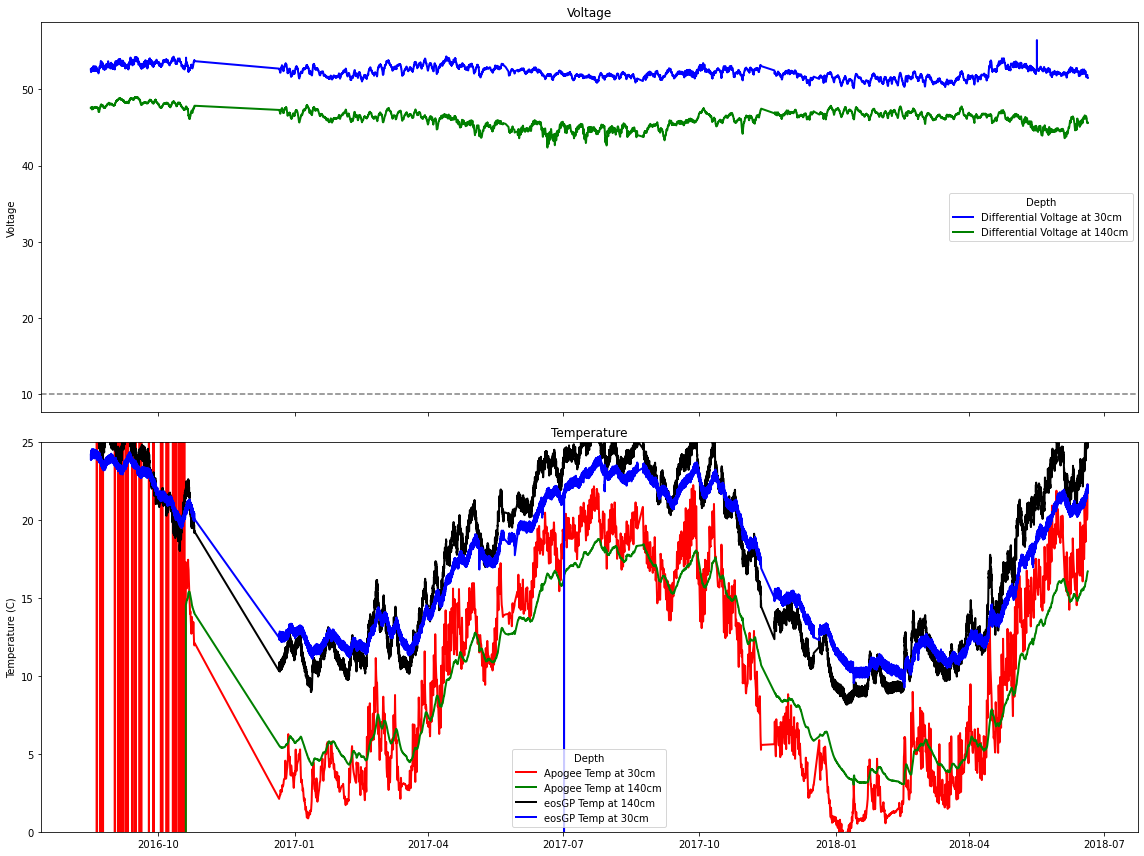

In [6]:
# Plot the datalogger parameters: battery voltage, panel temperature, enclosure temperature, and barometric pressure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df.index, df['DiffVolt_20cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df.index, df['DiffVolt_140cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures
#  - for some reason I can't use df['ApogeeTemp_30cm.deg.C'] and have to instead use df.iloc[:,6]
#  - The data for Apogee Temp at 140cm seems to be all messed up
ax2.plot(df.index, df["ApogeeTemp_20cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df.index, df["ApogeeTemp_140cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 140cm')
ax2.plot(df.index, df['GPTemp_140cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 140cm')
ax2.plot(df.index, df['GPTemp_20cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature', ylim=[0,25])
ax2.legend(title='Depth', loc='best')


In [7]:
#Correct Apogee SO-110 O2 data
# - Apogee data has already been calibrated, although it is in percent saturation. Should we switch to ppm, or is this fine? 
#cal_fac = 0.379
#offset = 1.14
#df['SoilO2_30cm.kPa'] = cal_fac*df['SoilO2_30cm.percent.0-100'] - offset # Convert from mV to kPa
#df['SoilO2_140cm.kPa'] = cal_fac*df['SoilO2_140cm.percent.0-100'] - offset

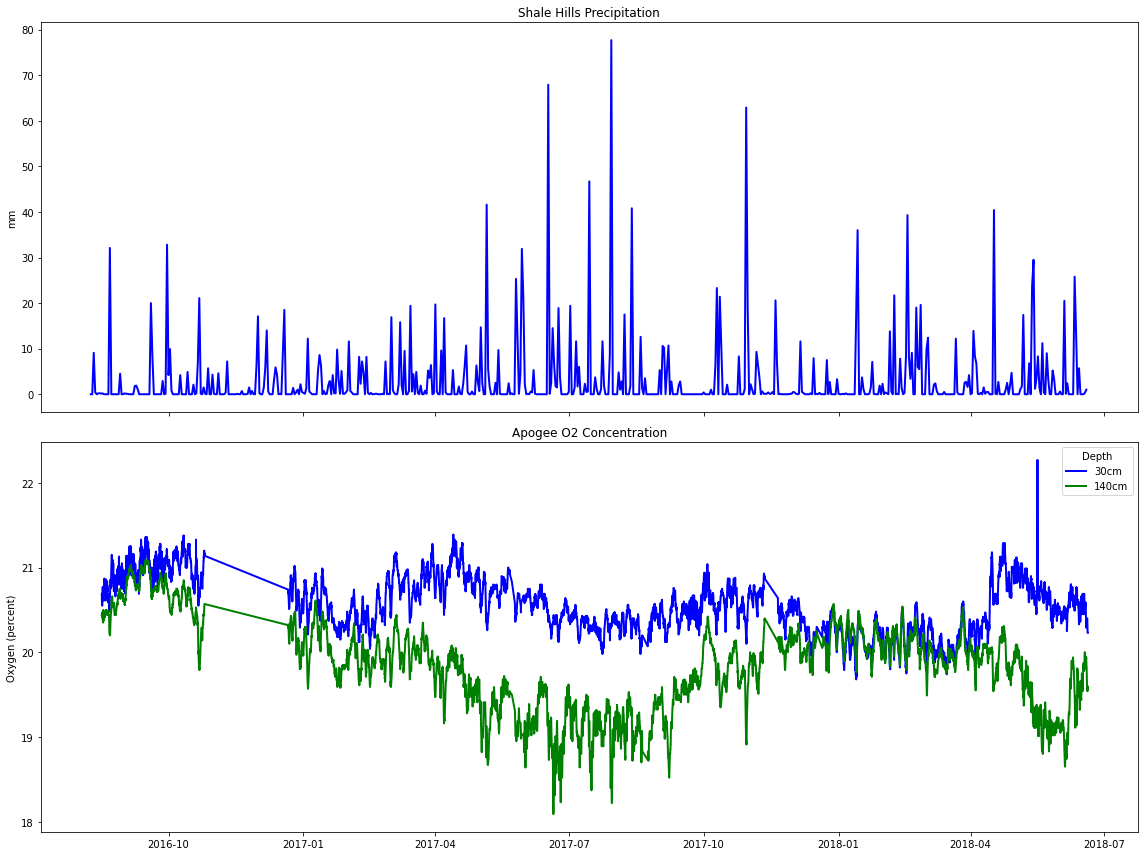

In [8]:
df.loc['2006-1-1':'2016-8-8']=np.nan


fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['Precipitation.mm'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='Shale Hills Precipitation')

ax2.plot(df.index, df['O2_20cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.plot(df.index, df['O2_140cm.percent.0-100'], 'g', linewidth=2, label='140cm')
ax2.legend(title='Depth', loc='best')

#df['Apogee_CorrO2_Avg'] = df['SoilO2_30cm.kPa']/df['BarometricPress_Avg']*100
#ax3.plot(df.index, df['Apogee_CorrO2_Avg'], 'k', linewidth=2)
#ax3.set(ylabel='Oxygen (%)', title='Apogee O2 Concentration');

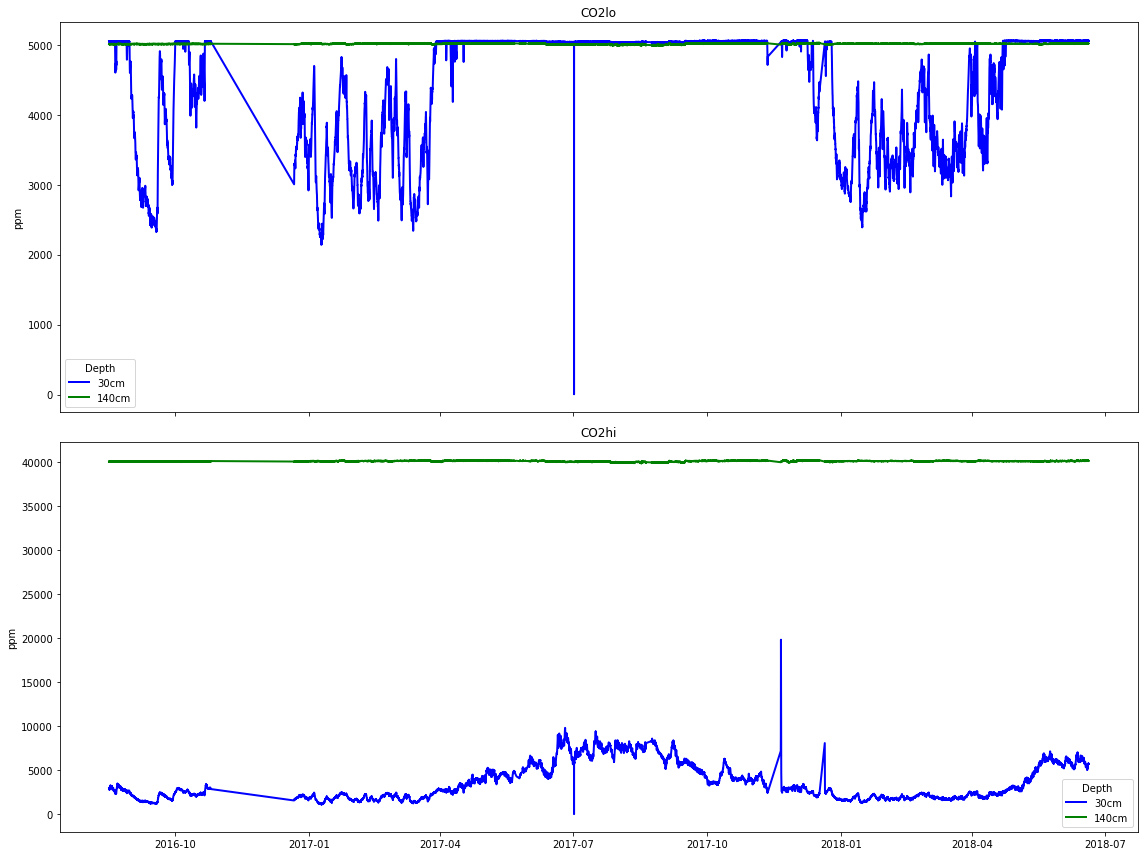

In [9]:
#Correct CO2 data 
#df['pct_change_CO2lo30']=(df['CO2lo_30cm.ppm'].pct_change())
#df['CO2lo_30cm.ppm'].mask(df['pct_change_CO2lo30']>=.5, inplace=True)
#df['CO2lo_30cm.ppm'].mask(df['pct_change_CO2lo30']<=-.5, inplace=True)

#df['pct_change_CO2hi30']=(df['CO2hi_30cm.ppm'].pct_change())
#df['CO2hi_30cm.ppm'].mask(df['pct_change_CO2hi30']>=.5, inplace=True)
#df['CO2hi_30cm.ppm'].mask(df['pct_change_CO2hi30']<=-.5, inplace=True)

#df['CO2lo_30cm.ppm'].loc['4/20/2018 2:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
#df['CO2hi_30cm.ppm'].loc['4/20/2018 2:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
#df['CO2hi_140cm.ppm'].loc['2/24/2018  6:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['CO2lo_20cm.ppm'], 'b', linewidth=2, label='30cm')
ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
#ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax1.set(ylabel='ppm', title='CO2lo')
ax1.legend(title='Depth', loc='best')
ax2.plot(df.index, df['CO2hi_20cm.ppm'], 'b', linewidth=2, label='30cm')
ax2.plot(df.index, df['CO2hi_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax2.set(ylabel='ppm', title='CO2hi')
ax2.legend(title='Depth', loc='best')

In [10]:
output=df.copy()
today = dt.date.today()
outfile = 'CO2 Data/processed_data/Shale Hills/NPMS_CO2_O2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [11]:
output

,DiffVolt_20cm.mV,DiffVolt_140cm.mV,O2_20cm.percent.0-100,O2_140cm.percent.0-100,ApogeeTemp_20cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_20cm.ppm,CO2hi_20cm.ppm,GPTemp_20cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C,Precipitation.mm,Device
TmStamp,,,,,,,,,,,,,,
2016-08-16 12:00:00,52.599998,47.560001,20.690001,20.440001,-273.20001,-105.4,5050.2031,2985.0740,24.200001,5009.4980,40075.980,25.700001,NaN,NaN
2016-08-16 13:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5044.7749,2957.9370,24.010000,5013.5679,40097.680,25.629999,NaN,NaN
2016-08-16 14:00:00,52.389999,47.560001,20.610001,20.440001,-273.20001,-105.4,5048.8838,2887.4031,23.860001,5006.8208,40054.570,25.740000,NaN,NaN
2016-08-16 15:00:00,52.320000,47.590000,20.580000,20.459999,-273.20001,-105.4,5045.0688,2854.9829,24.110001,5009.7900,40067.461,25.709999,NaN,NaN
2016-08-16 16:00:00,52.320000,47.560001,20.580000,20.440001,-273.20001,-105.4,5048.8481,2795.1160,24.219999,5008.1421,40054.289,26.139999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
